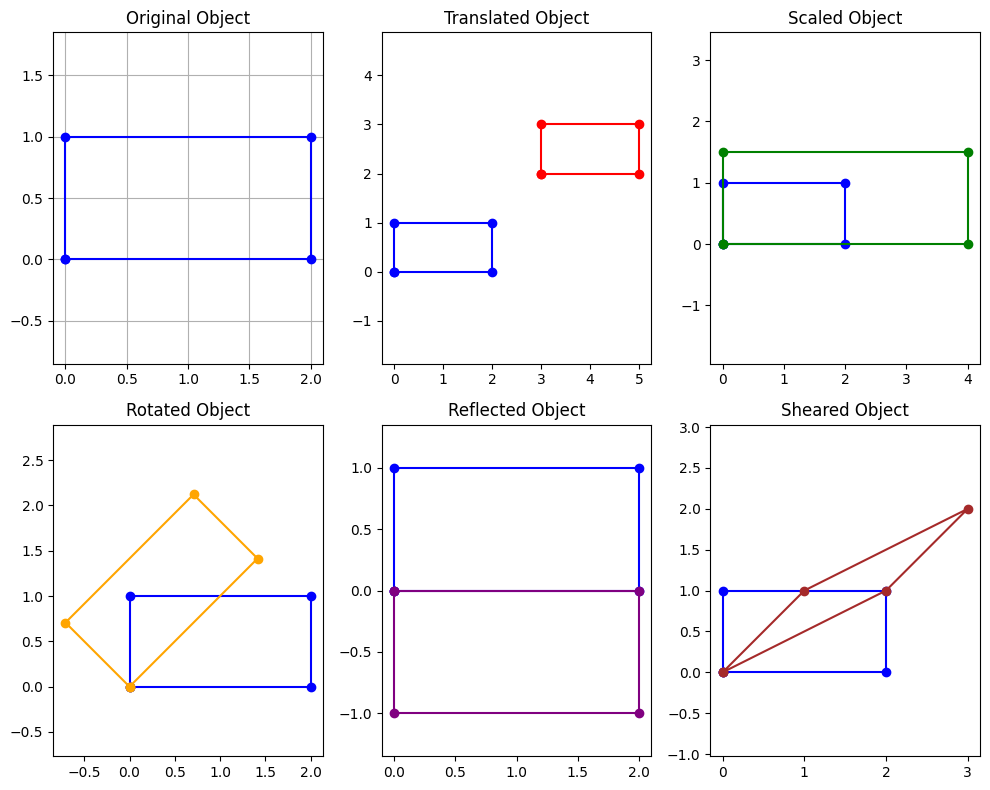

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D object (e.g., a rectangle)
def plot_object(points, title, color='blue'):
    x, y = zip(*points)
    x = np.append(x, x[0])  # Close the shape
    y = np.append(y, y[0])
    plt.plot(x, y, color=color, marker='o') # Plot the shape with markers at vertices
    plt.title(title) # Set the title of the plot
    plt.grid()  # Display a grid for reference
    plt.axis('equal')  # Ensure equal aspect ratio for both axes

# Transformation functions
def translate(points, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    return apply_transformation(points, translation_matrix)

def scale(points, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    return apply_transformation(points, scaling_matrix)

def rotate(points, angle):
    rad = np.radians(angle) # Convert degrees to radians
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                                 [np.sin(rad), np.cos(rad), 0],
                                 [0, 0, 1]])
    return apply_transformation(points, rotation_matrix)

def reflect(points, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    else:
        raise ValueError("Invalid axis. Choose 'x' or 'y'.")
    return apply_transformation(points, reflection_matrix)

def shear(points, shx=0, shy=0):
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    return apply_transformation(points, shearing_matrix)

# Helper to apply a transformation
def apply_transformation(points, matrix):
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1)))) # Convert to homogeneous coordinates
    transformed_points = homogeneous_points @ matrix.T # Apply matrix transformation
    return transformed_points[:, :2] # Convert back to 2D

# Main demonstration
if __name__ == "__main__":
    original_points = np.array([[0, 0], [2, 0], [2, 1], [0, 1]])  # Rectangle
    plt.figure(figsize=(10, 8))

    # Original object
    plt.subplot(2, 3, 1)
    plot_object(original_points, "Original Object")

    # Translation
    translated = translate(original_points, 3, 2)
    plt.subplot(2, 3, 2)
    plot_object(original_points, "Translated Object")
    plot_object(translated, "Translated Object", color='red')

    # Scaling
    scaled = scale(original_points, 2, 1.5)
    plt.subplot(2, 3, 3)
    plot_object(original_points, "Scaled Object")
    plot_object(scaled, "Scaled Object", color='green')

    # Rotation
    rotated = rotate(original_points, 45)
    plt.subplot(2, 3, 4)
    plot_object(original_points, "Rotated Object")
    plot_object(rotated, "Rotated Object", color='orange')

    # Reflection
    reflected = reflect(original_points, 'x')
    plt.subplot(2, 3, 5)
    plot_object(original_points, "Reflected Object")
    plot_object(reflected, "Reflected Object", color='purple')

    # Shearing
    sheared = shear(original_points, shx=1.0, shy=0.5)
    plt.subplot(2, 3, 6)
    plot_object(original_points, "Sheared Object")
    plot_object(sheared, "Sheared Object", color='brown')

    plt.tight_layout()
    plt.show()


Saving Screenshot 2025-01-16 111732.png to Screenshot 2025-01-16 111732 (1).png


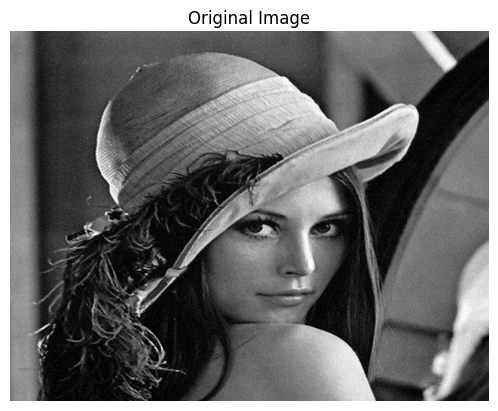

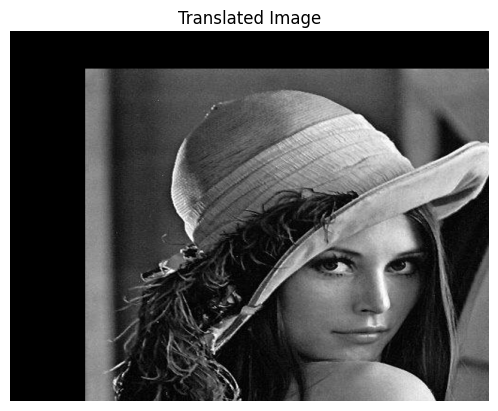

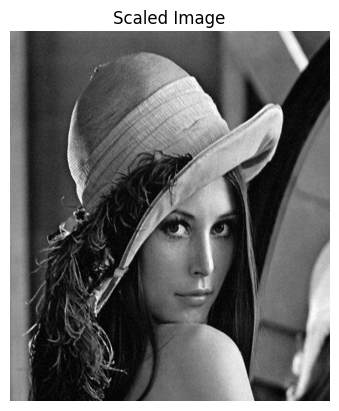

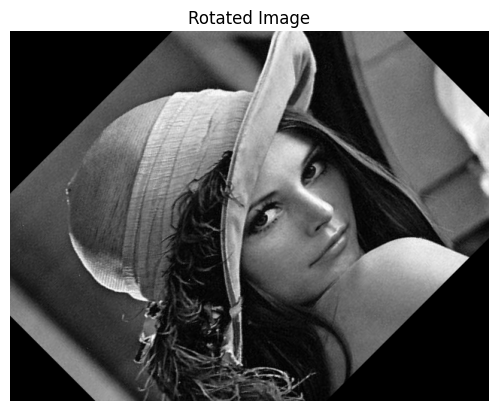

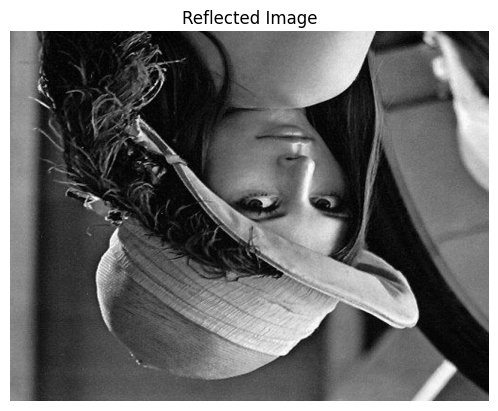

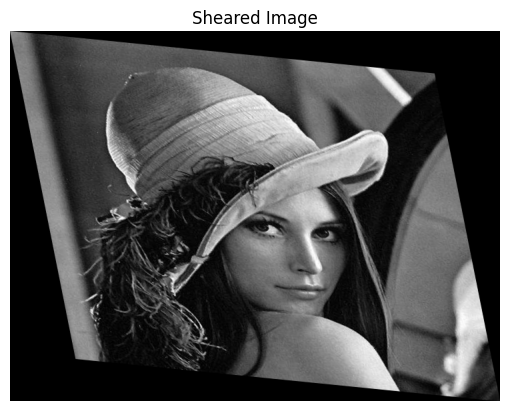

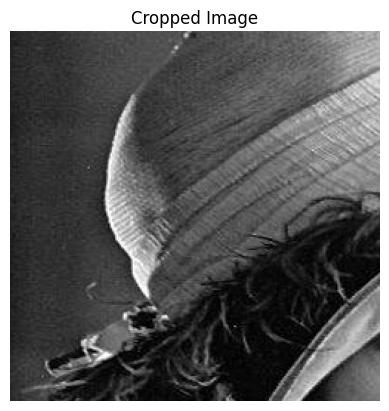

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image
from google.colab import files
uploaded = files.upload()

img = cv2.imread(list(uploaded.keys())[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

# 1. Translation
def translate_image(img, tx, ty):
    rows, cols, _ = img.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

# 2. Scaling
def scale_image(img, sx, sy):
    return cv2.resize(img, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

# 3. Rotation
def rotate_image(img, angle):
    rows, cols, _ = img.shape
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

# 4. Reflection
def reflect_image(img, axis):
    return cv2.flip(img, {'x': 0, 'y': 1}.get(axis, -1))

# 5. Shearing
def shear_image(img, shx=0, shy=0):
    rows, cols, _ = img.shape
    shear_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols + int(shx * rows), rows + int(shy * cols)))

# 6. Cropping
def crop_image(img, x_start, y_start, x_end, y_end):
    return img[y_start:y_end, x_start:x_end]

# Demonstrations
plot_image(img, "Original Image")

plot_image(translate_image(img, 100, 50), "Translated Image")
plot_image(scale_image(img, 1, 1.5), "Scaled Image")
plot_image(rotate_image(img, 45), "Rotated Image")
plot_image(reflect_image(img, 'x'), "Reflected Image")
plot_image(shear_image(img, shx=0.2, shy=0.1), "Sheared Image")
plot_image(crop_image(img, 50, 50, 300, 300), "Cropped Image")
